In [94]:
import pandas as pd #reading in csv
import seaborn as sns #vis
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from geopy.geocoders import Nominatim

import json


# Info
y: accidents_2017.csv
air_qualityNov2017.csv
immigrantsbynation
population
unemployment

other sources?
weather, alcohol consumption

Min: ~5000

Preidct or by hour BY DAY (or by afternoon, morning, night) whether or not accidents will be greater than normal or less than normal 

 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí', Sants-Montjuic, 'Sarrià-Sant Gervasi

X: Datetime
Features: Part of Day, Air quality, District Name, Unemployment Rate,
Features (Maybe): Population, Bus stops 
Y: # of accidents

Barcelona - Poblenou --> Sants Marti YES

Barcelona - Sants --> Sants Monjuic YES

Barcelona - Eixample --> Eixample YES

Barcelona - Gracia --> Gracia YES

Barcelona - Eixample --> Eixample YES

Barcelona - Ciutadella  --> Ciuta Della YES

Barcelona - Palau Reial --> Les Corts YES

In [3]:
acc = pd.read_csv('barcelona-data-sets/accidents_2017.csv')


In [4]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [57]:
#acc['District Name']
acc['Part of the day'].value_counts()

Afternoon    5082
Morning      4067
Night        1190
Name: Part of the day, dtype: int64

In [6]:
def render_json(loc):
    #prettifies json from input location from geopy
    output = json.dumps(loc.raw, indent=2)
    line_list = output.split("\n")  # Sort of line replacing "\n" with a new line
    # Now that our obj is a list of strings leverage print's automatic newline
    for line in line_list:
        print(line)
    

In [84]:
def find_loc(long,lat):
    geolocator = Nominatim()
    loc = geolocator.reverse(lat,long) #(latitude, longitude) from unemployment or accidents
    print(loc.raw["address"])

# EDA

In [45]:
acc['District Name'].value_counts()

Eixample               3029
Sant Martí             1336
Sarrià-Sant Gervasi    1104
Sants-Montjuïc         1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Unknown                  27
Name: District Name, dtype: int64

Ciutat Vella = 600

'Eixample', = 3029

'Gràcia', = 531

'Horta-Guinardó', = 743

'Les Corts', = 726

'Nou Barris', = 542

'Sant Andreu', = 597

'Sant Martí', = 1136

 Sants-Montjuic, = 1104
 
'Sarrià-Sant Gervasi = 1104

Unknown = 27

Found using len(acc.loc[acc['District Name'] == 'Ciutat Vella' ])

In [9]:
len(acc.loc[acc['District Name'] == 'Eixample' ])

3029

In [10]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


# Converting Dates to Dataframe (Test)

In [38]:
# Format is always Y-M-D H:M:S
#has month/day/hour/year NO MINUTE 

acc['Datetime']  = (pd.to_datetime('2017' + '-' +
                                  acc['Month'].astype(str) + '-' +
                                  acc['Day'].astype(str) + ' ' +
                                  acc['Hour'].astype(str)+':00:00'))

In [39]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
Datetime,,,,,,,,,,,,,,,,
2017-10-13 08:00:00,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
2017-09-01 13:00:00,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2017-12-08 21:00:00,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
2017-07-21 02:00:00,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
2017-05-25 14:00:00,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [31]:
acc['Datetime'].head()

Datetime
2017-10-13 08:00:00   2017-10-13 08:00:00
2017-09-01 13:00:00   2017-09-01 13:00:00
2017-12-08 21:00:00   2017-12-08 21:00:00
2017-07-21 02:00:00   2017-07-21 02:00:00
2017-05-25 14:00:00   2017-05-25 14:00:00
Name: Datetime, dtype: datetime64[ns]

In [42]:
#acc.drop(columns=['Month','Day','Hour','Street','Neighborhood Name']).to_csv('acc_datetime.csv')

In [33]:
#acc = acc.set_index('Datetime')
#acc.index

DatetimeIndex(['2017-10-13 08:00:00', '2017-09-01 13:00:00',
               '2017-12-08 21:00:00', '2017-07-21 02:00:00',
               '2017-05-25 14:00:00', '2017-09-20 12:00:00',
               '2017-05-20 21:00:00', '2017-12-26 20:00:00',
               '2017-06-12 15:00:00', '2017-05-03 20:00:00',
               ...
               '2017-11-05 09:00:00', '2017-02-16 12:00:00',
               '2017-07-20 09:00:00', '2017-05-10 11:00:00',
               '2017-06-08 19:00:00', '2017-04-25 08:00:00',
               '2017-03-08 12:00:00', '2017-12-28 08:00:00',
               '2017-07-14 14:00:00', '2017-01-08 20:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=10339, freq=None)

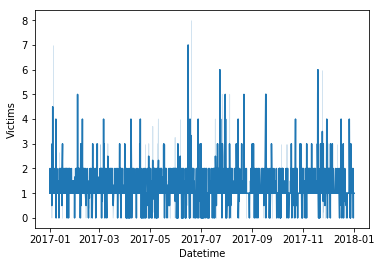

In [53]:
#ax = sns.lineplot(x="Datetime", y="Victims", hue='District Name', data=acc)
ax = sns.lineplot(x='Datetime', y="Victims", data=acc.loc[acc['District Name'] == 'Eixample' ])

In [36]:
#DO IT BY DAY 
acc.index.value_counts()
#acc.loc['2017-01-01':'2017-01-02']


2017-10-31 14:00:00    9
2017-05-19 20:00:00    8
2017-03-23 08:00:00    8
2017-09-22 15:00:00    8
2017-01-17 12:00:00    8
2017-01-13 14:00:00    8
2017-10-23 18:00:00    8
2017-06-26 16:00:00    8
2017-06-13 18:00:00    8
2017-04-21 15:00:00    7
2017-10-20 16:00:00    7
2017-06-13 09:00:00    7
2017-09-12 09:00:00    7
2017-03-20 09:00:00    7
2017-06-30 17:00:00    7
2017-07-24 13:00:00    7
2017-07-13 14:00:00    7
2017-07-13 13:00:00    7
2017-11-22 08:00:00    7
2017-10-04 18:00:00    7
2017-07-28 18:00:00    7
2017-02-14 08:00:00    7
2017-06-06 16:00:00    7
2017-11-24 09:00:00    7
2017-03-24 18:00:00    7
2017-11-07 14:00:00    7
2017-07-05 17:00:00    7
2017-05-15 16:00:00    7
2017-07-07 13:00:00    7
2017-05-31 09:00:00    7
                      ..
2017-01-01 22:00:00    1
2017-01-02 23:00:00    1
2017-01-10 21:00:00    1
2017-05-21 05:00:00    1
2017-03-14 21:00:00    1
2017-02-09 15:00:00    1
2017-02-09 05:00:00    1
2017-10-31 06:00:00    1
2017-02-23 21:00:00    1


In [56]:
acc.loc['2017-1-1 01:00:00':'2017-1-2 01:00:00']


,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
Datetime,,,,,,,,,,,,,,,,
2017-01-01 10:00:00,2017S000008,Eixample,la Dreta de l'Eixample,ARAGÓ / Pau Claris ...,Sunday,January,1,10,Morning,2,0,2,2,2.166376,41.393276,2017-01-01 10:00:00
2017-01-01 15:00:00,2017S000013,Eixample,la Dreta de l'Eixample,ARAGÓ / Pg Gràcia ...,Sunday,January,1,15,Afternoon,1,0,1,1,2.164884,41.392165,2017-01-01 15:00:00
2017-01-01 10:00:00,2017S000012,Eixample,el Fort Pienc,GV CORTS CATALANES / Castillejos ...,Sunday,January,1,10,Morning,2,0,2,2,2.184624,41.401695,2017-01-01 10:00:00
2017-01-01 04:00:00,2017S000001,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,VIA AUGUSTA ...,Sunday,January,1,4,Night,1,0,1,1,2.151330,41.400771,2017-01-01 04:00:00
2017-01-01 22:00:00,2017S000022,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,AV DIAGONAL ...,Sunday,January,1,22,Night,1,0,1,2,2.150274,41.394437,2017-01-01 22:00:00
2017-01-01 12:00:00,2017S000021,Sant Martí,el Besòs i el Maresme,CRISTÓBAL DE MOURA / Maresme ...,Sunday,January,1,12,Morning,0,0,0,4,2.211914,41.415181,2017-01-01 12:00:00
2017-01-01 07:00:00,2017S000004,Eixample,la Sagrada Família,BALMES / Rosselló ...,Sunday,January,1,7,Morning,1,0,1,2,2.157359,41.393310,2017-01-01 07:00:00
2017-01-01 13:00:00,2017S000007,Sants-Montjuïc,la Marina del Prat Vermell,ULLDECONA / Sovelles ...,Sunday,January,1,13,Morning,0,0,0,1,2.143206,41.352396,2017-01-01 13:00:00
2017-01-01 19:00:00,2017S000018,Eixample,l'Antiga Esquerra de l'Eixample,MUNTANER ...,Sunday,January,1,19,Afternoon,1,0,1,2,2.151249,41.392650,2017-01-01 19:00:00


In [37]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
Datetime,,,,,,,,,,,,,,,
2017-10-13 08:00:00,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
2017-09-01 13:00:00,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2017-12-08 21:00:00,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
2017-07-21 02:00:00,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
2017-05-25 14:00:00,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


# Air Quality

In [59]:
#read airquality
AQ = pd.read_csv('barcelona-data-sets/air_quality_Nov2017.csv')

In [60]:
AQ.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [101]:
#find which district these stations lie in
AQ.loc[AQ['Station'] == 'Barcelona - Palau Reial' ]

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
5,Barcelona - Palau Reial,Good,2.1151,41.3875,23h,Good,11.0,23h,Good,57.0,23h,Good,23.0,01/11/2018 0:00,1541027104
13,Barcelona - Palau Reial,Good,2.1151,41.3875,0h,Good,27.0,0h,Good,38.0,1h,Good,24.0,01/11/2018 1:00,1541030725
21,Barcelona - Palau Reial,Good,2.1151,41.3875,1h,Good,34.0,1h,Good,28.0,2h,Good,24.0,01/11/2018 2:00,1541034303
29,Barcelona - Palau Reial,Good,2.1151,41.3875,2h,Good,38.0,2h,Good,19.0,3h,Good,24.0,01/11/2018 3:00,1541037902
37,Barcelona - Palau Reial,Good,2.1151,41.3875,3h,Good,57.0,3h,Good,7.0,4h,Good,23.0,01/11/2018 4:00,1541041503
45,Barcelona - Palau Reial,Good,2.1151,41.3875,4h,Good,48.0,4h,Good,8.0,5h,Good,21.0,01/11/2018 5:00,1541045102
53,Barcelona - Palau Reial,Good,2.1151,41.3875,5h,Good,41.0,5h,Good,11.0,6h,Good,17.0,01/11/2018 6:00,1541048703
61,Barcelona - Palau Reial,Good,2.1151,41.3875,6h,Good,28.0,6h,Good,17.0,7h,Good,15.0,01/11/2018 7:00,1541052302
69,Barcelona - Palau Reial,Good,2.1151,41.3875,7h,Good,10.0,7h,Good,34.0,8h,Good,13.0,01/11/2018 8:00,1541055903
77,Barcelona - Palau Reial,Good,2.1151,41.3875,8h,Good,7.0,8h,Good,36.0,9h,Good,12.0,01/11/2018 9:00,1541059503


In [88]:
find_loc(41.3864,2.1874)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


KeyError: 'address'

In [61]:
AQ['Station'].value_counts()

Barcelona - Observ Fabra    718
Barcelona - Poblenou        718
Barcelona - Gràcia          718
Barcelona - Sants           718
Barcelona - Vall Hebron     718
Barcelona - Eixample        718
Barcelona - Ciutadella      718
Barcelona - Palau Reial     718
Name: Station, dtype: int64

In [78]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
Station         5744 non-null object
Air Quality     5744 non-null object
Longitude       5744 non-null float64
Latitude        5744 non-null float64
O3 Hour         4268 non-null object
O3 Quality      4268 non-null object
O3 Value        4101 non-null float64
NO2 Hour        5689 non-null object
NO2 Quality     5689 non-null object
NO2 Value       5460 non-null float64
PM10 Hour       3722 non-null object
PM10 Quality    3722 non-null object
PM10 Value      3647 non-null float64
Generated       5744 non-null object
Date Time       5744 non-null int64
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


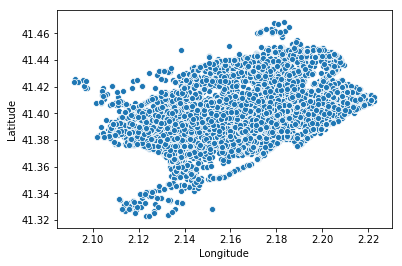

In [79]:
# scatterplot of points
#lat = x
#long = y
ax = sns.scatterplot(x='Longitude',y='Latitude',data=acc)


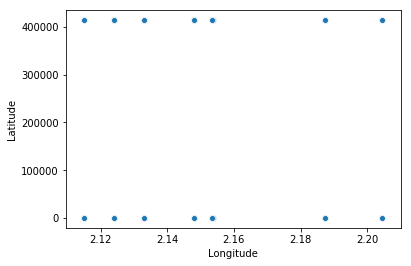

In [80]:
ax = sns.scatterplot(x='Longitude',y='Latitude',data=AQ)


Barcelona - Observ Fabra --> some observatory in a benedictine temple???
Barcelona - Poblenou --> Sants Marti
Barcelona - Sants --> Sants Monjuic
Barcelona - Eixample --> Eixample
Barcelona - Gracia --> Gracia
Barcelona - Vall Hebron --> La Val D'Hebron
Barcelona - Eixample --> Eixample
Barcelona - Ciutadella  --> Ciuta Della
Barcelona - Palau Reial --> Les Corts

In [100]:
AQ[0:10]

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
5,Barcelona - Palau Reial,Good,2.1151,41.3875,23h,Good,11.0,23h,Good,57.0,23h,Good,23.0,01/11/2018 0:00,1541027104
6,Barcelona - Poblenou,Good,2.2045,41.4039,NaN,NaN,NaN,23h,Good,86.0,23h,Good,32.0,01/11/2018 0:00,1541027104
7,Barcelona - Observ Fabra,Good,2.1239,41.4183,23h,Good,58.0,23h,Good,3.0,23h,Good,25.0,01/11/2018 0:00,1541027104
8,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,62.0,NaN,NaN,NaN,01/11/2018 1:00,1541030725
9,Barcelona - Eixample,Good,2.1538,41.3853,0h,Good,6.0,0h,Good,80.0,1h,Good,35.0,01/11/2018 1:00,1541030725


In [ ]:
print(loc.raw["address"]["city_district"])

# Unemployment

In [66]:
unemployment = pd.read_csv('barcelona-data-sets/unemployment.csv')

In [76]:
unemployment['District Name'].value_counts()

Nou Barris             2496
Horta-Guinardó         2112
Sant Martí             1920
Sants-Montjuïc         1536
Sant Andreu            1344
Sarrià-Sant Gervasi    1152
Eixample               1152
Gràcia                  960
Ciutat Vella            768
Les Corts               576
No consta               192
Name: District Name, dtype: int64

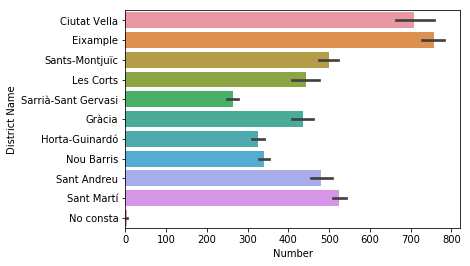

In [83]:
ax = sns.barplot(x="Number", y="District Name", data=unemployment)

In [84]:
unemployment.head()

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630


In [69]:
unemployment['Demand_occupation'].value_counts()

Registered unemployed    8880
Unemployment demand      5328
Name: Demand_occupation, dtype: int64

In [71]:
unemployment.loc[unemployment['Demand_occupation'] == 'Registered unemployed']

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630
5,2017,January,2,Eixample,6,la Sagrada Família,Male,Registered unemployed,1032
6,2017,January,2,Eixample,7,la Dreta de l'Eixample,Male,Registered unemployed,655
7,2017,January,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,Registered unemployed,751
8,2017,January,2,Eixample,9,la Nova Esquerra de l'Eixample,Male,Registered unemployed,1128
9,2017,January,2,Eixample,10,Sant Antoni,Male,Registered unemployed,847


In [70]:
unemployment['Month'].value_counts()

May          1184
April        1184
December     1184
July         1184
January      1184
September    1184
March        1184
October      1184
November     1184
August       1184
June         1184
February     1184
Name: Month, dtype: int64

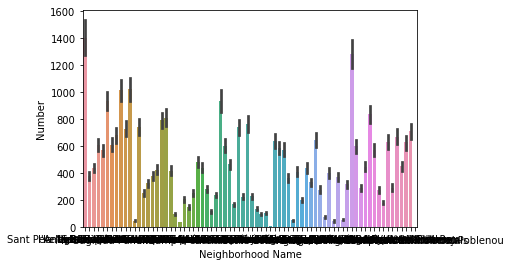

In [85]:
ax = sns.barplot(x="Neighborhood Name", y="Number", data=unemployment)

In [67]:
unemployment['Neighborhood Name']
#conclusion - too many neighbor hood name, must do by district

0                                            el Raval
1                                      el Barri Gòtic
2                                      la Barceloneta
3               Sant Pere, Santa Caterina i la Ribera
4                                       el Fort Pienc
5                                  la Sagrada Família
6                              la Dreta de l'Eixample
7                     l'Antiga Esquerra de l'Eixample
8                      la Nova Esquerra de l'Eixample
9                                         Sant Antoni
10                                       el Poble Sec
11                         la Marina del Prat Vermell
12                                  la Marina de Port
13                              la Font de la Guatlla
14                                        Hostafrancs
15                                         la Bordeta
16                                      Sants - Badal
17                                              Sants
18                          

In [64]:
acc['District Name'].value_counts()


Eixample               3029
Sant Martí             1336
Sarrià-Sant Gervasi    1104
Sants-Montjuïc         1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Unknown                  27
Name: District Name, dtype: int64

In [68]:
unemployment['District Name'].value_counts()


Nou Barris             2496
Horta-Guinardó         2112
Sant Martí             1920
Sants-Montjuïc         1536
Sant Andreu            1344
Sarrià-Sant Gervasi    1152
Eixample               1152
Gràcia                  960
Ciutat Vella            768
Les Corts               576
No consta               192
Name: District Name, dtype: int64

 we have 10 similar districts: 
 Ciutat Vella', 
'Eixample', 
'Gràcia',
'Horta-Guinardó', 
'Les Corts', 
'Nou Barris',
'Sant Andreu', 
'Sant Martí',
Sants-Montjuic,
'Sarrià-Sant Gervasi, 
(no consta = does not include = acc[unknow]


# Mapping to city district with latitude longitude

In [89]:
!pip3 install geopy

In [90]:
import geopy

In [99]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.reverse("41.416365,2.185272") #(latitude, longitude) from unemployment or accidents
print(loc.raw)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


{'place_id': 250285559, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 662895804, 'lat': '41.4163216', 'lon': '2.18524439166667', 'display_name': '323, Carrer de Las Navas de Tolosa, Navas, Sant Martí, Barcelona, BCN, CAT, 08026, España', 'address': {'house_number': '323', 'road': 'Carrer de Las Navas de Tolosa', 'neighbourhood': 'Navas', 'suburb': 'Navas', 'city_district': 'Sant Martí', 'city': 'Barcelona', 'county': 'BCN', 'state': 'CAT', 'postcode': '08026', 'country': 'España', 'country_code': 'es'}, 'boundingbox': ['41.4162229', '41.4164105', '2.1851207', '2.1853295']}


In [92]:
render_json(loc)

{
  "place_id": 250285559,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 662895804,
  "lat": "41.4163216",
  "lon": "2.18524439166667",
  "display_name": "323, Carrer de Las Navas de Tolosa, Navas, Sant Mart\u00ed, Barcelona, BCN, CAT, 08026, Espa\u00f1a",
  "address": {
    "house_number": "323",
    "road": "Carrer de Las Navas de Tolosa",
    "neighbourhood": "Navas",
    "suburb": "Navas",
    "city_district": "Sant Mart\u00ed",
    "city": "Barcelona",
    "county": "BCN",
    "state": "CAT",
    "postcode": "08026",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.4162229",
    "41.4164105",
    "2.1851207",
    "2.1853295"
  ]
}


In [97]:
d = []

In [106]:
for index, row in AQ.iterrows():
    #print(row['Latitude'], row['Longitude'])
    geolocator = Nominatim()
    loc = geolocator.reverse(row['Latitude'],row['Longitude']) #(latitude, longitude)
    render_json(loc)
    print(loc.raw["address"])
#loop through each long,lat pair 
#find district name with geolocator
#append to dictionary
#find how many districts


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


GeocoderTimedOut: Service timed out

# how to correlate features
Same District
Same date (at the very least) 
- unemployment is only by year and month
- air quality is only by m/d/y 
- # accidents is by m d no year (year is ONLY 2017) 
- aq and acc can be ampped by district and time


In [1]:
# time series 
# regression (mean squared)
# % that the # of accidnets will be > 5 for example 
# or greater than the mean PER district

# Models

In [ ]:
# Random Forest
# ARIMA
# LSTM

# Evaluation

In [ ]:
#mean squared error